In [8]:
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import numpy as np

In [26]:
# Load the CIFAR10 dataset
(train_dataset, test_dataset), dataset_info = tfds.load('cifar10', split=['train', 'test'], shuffle_files=True, with_info=True)

# Shuffle the dataset
shuffled_train_dataset = train_dataset.shuffle(2048)

# Take the first n instances from the shuffled dataset
sampled_train_dataset = shuffled_train_dataset.take(50000)

# Create an empty list to store the images
images = []

# Iterate over the dataset
for example in sampled_train_dataset.as_numpy_iterator():
    # Get the image from the example and append it to the list
    images.append(example['image'])

# Convert the list of images to a numpy array
images = np.array(images)

# Save the array
np.savez(f'/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/cirfar10_true_50000.npz', images=images)

2023-07-26 19:21:06.520937: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-07-26 19:21:07.100161: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [1]
	 [[{{node Placeholder/_2}}]]
2023-07-26 19:21:07.101537: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [1]
	 [[{{node Placeholder/_1}}]]


In [27]:
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import numpy as np

sizes = [500,  2000,  4000,  6000,  8000, 10001, 15000,  1000, 12500, 20000]

from zijing_main import *

def get_fid(n):
    data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/'
                           'samples/cirfar10_true_10000.npz')
    data_samples = data['images'].transpose(0,3,1,2)
    data_samples = np.interp(data_samples, (data_samples.min(), data_samples.max()), (0, 1))

    file_path = '/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/cirfar10_true_50000.npz'
    data = np.load(file_path)
    # if images.shape[1]==3:
    #     images = images.transpose(0,2,3,1)
    # print(data['images'].shape)
    gen_samples = data['images'][:n]
    gen_samples = np.interp(gen_samples, (gen_samples.min(), gen_samples.max()), (0, 1))

    fid = compute_fid_nchw(data_samples, gen_samples)
    return fid

# fid_trails = np.zeros((len(sizes),5))

# for i, n in enumerate(sizes):
#     for j, trial in enumerate(['a', 'b', 'c', 'd', 'e']):
#         print(f'{i} out of {len(sizes)}')
#         file_path = f'/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/cirfar10_true_{n}{trial}.npz'
#         fid = get_fid(file_path)
#         print(fid)
#         fid_trails[i, j] = fid

# np.savez('/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/trial_fids.npz', fid_trails=fid_trails)

(100, 3, 32, 32)
(10000, 3, 32, 32)
(100, 3, 32, 32)
(100, 32, 32, 3)
1.0
0.0


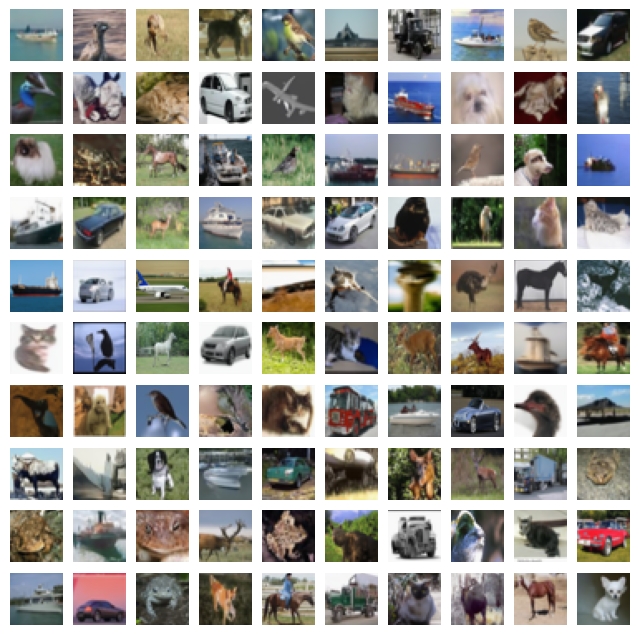

In [27]:
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/'
                        'samples/cirfar10_true_10000.npz')
data_samples = data['images'].transpose(0,3,1,2)
data_samples = np.interp(data_samples, (data_samples.min(), data_samples.max()), (0, 1))
n=100
file_path = '/vol/bitbucket/fms119/score_sde_pytorch/samples/all_samples_50000.npz'
data = np.load(file_path)
gen_samples = data['images'][:n]
print(gen_samples.shape)
print(data_samples.shape)

gen_samples = np.interp(gen_samples, (gen_samples.min(), gen_samples.max()), (0, 1))

images = gen_samples

print(images.shape)

# Number of rows/columns in the grid
grid_size = 10

# Create a new figure
plt.figure(figsize=(8,8))

if images.shape[1]==3:
    images = images.transpose(0,2,3,1)

print(images.shape)
print(images.max())
print(images.min())

# Loop over the images
for i in range(grid_size * grid_size):
    # Create a subplot for each image
    plt.subplot(grid_size, grid_size, i+1)
    # Display the image
    random_image = np.random.randint(0, images.shape[0])
    plt.imshow(images[i])
    # Remove the axes
    plt.axis('off')

# Show the figure
plt.show()

In [16]:
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/fid_size_experiment.npz',)
fid_trials = data['fid_trails']
sizes = np.sort(
    [500,  2000,  4000,  6000,  8000, 10001, 15000,  1000, 12500, 20000,] 
    + list(range(30000, 60000, 10000)))


In [17]:
fid_trials.round(2).T

array([[52.77, 55.23, 56.59,  0.  ],
       [27.42, 30.16, 32.64,  0.  ],
       [11.42, 14.1 , 17.46,  0.  ],
       [ 4.06,  6.61, 10.48,  0.  ],
       [ 1.81,  4.29,  8.28,  0.  ],
       [ 0.75,  3.16,  7.24,  0.  ],
       [ 0.45,  2.5 ,  6.64,  0.  ],
       [ 0.63,  1.96,  6.11,  0.  ],
       [ 0.9 ,  1.6 ,  5.79,  0.  ],
       [ 1.32,  1.17,  0.  ,  0.  ],
       [ 1.76,  0.74,  0.  ,  0.  ],
       [ 1.98,  0.52,  0.  ,  0.  ],
       [ 2.11,  0.39,  0.  ,  0.  ]])

[56.5852809  32.6423458  17.45666537 10.48157016  8.28357161  7.23790776
  6.64261387  6.11200204  5.79030427  0.        ]


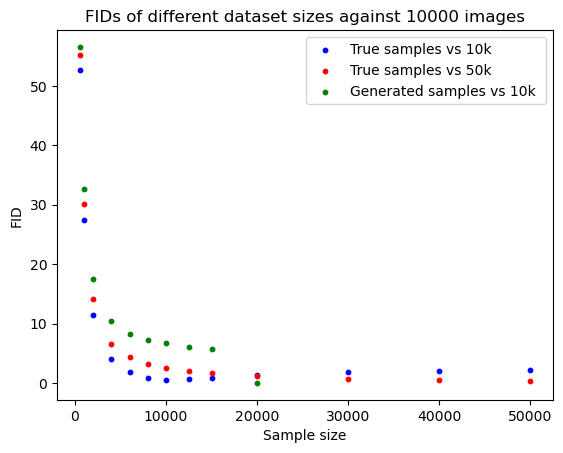

In [18]:
k = 10
plt.scatter(sizes, fid_trials[0].T.reshape(-1), s=10, c='b', 
            label='True samples vs 10k')
plt.scatter(sizes, fid_trials[1], s=10, c='r', 
            label='True samples vs 50k')
print(fid_trials[2][:k])
plt.scatter(sizes[:k], fid_trials[2][:k], s=10, c='g', 
            label='Generated samples vs 10k ')
# plt.yscale('log')
plt.title('FIDs of different dataset sizes against 10000 images')
plt.ylabel('FID')
plt.xlabel('Sample size')
plt.legend()
plt.show()

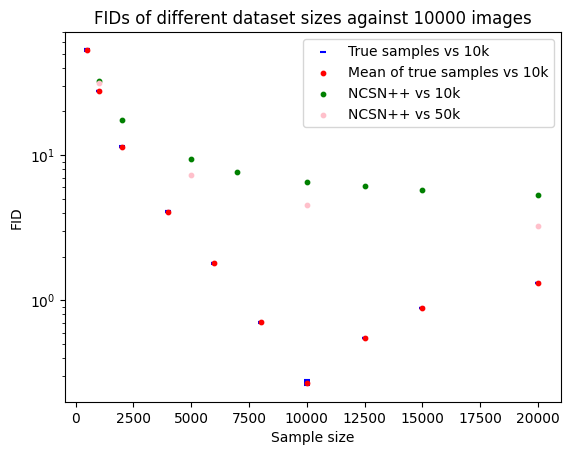

In [14]:
plt.scatter(sizes*5, fid_trails[:].T.reshape(-1), s=20, c='b', 
            label='True samples vs 10k', marker='_')
plt.scatter(sizes, fid_trails.mean(axis=1), s=10, c='r', 
            label='Mean of true samples vs 10k')
plt.scatter(
    [10000, 1000, 5000, 7000, 2000, 20000, 15000, 12500], 
    [6.53987, 32.508, 9.37150, 7.5986, 17.4984, 5.33, 5.763, 6.07865], 
    s=10, c='g', label='NCSN++ vs 10k')
# plt.scatter(
#     sizes, 
#     ys_fid_trails[:-1], 
#     s=10, c='orange', label='True samples vs 50k')
plt.scatter(
    [10000, 1000, 5000, 20000], 
    [4.497873, 31.2974, 7.24602, 3.2656], 
    s=10, c='pink', label='NCSN++ vs 50k')
plt.yscale('log')
plt.title('FIDs of different dataset sizes against 10000 images')
plt.ylabel('FID')
plt.xlabel('Sample size')
plt.legend()
plt.show()

Would be interesting to show that the FID is biased and this is why we see it increasing after 10 000 samples.

Took 35 minutes to run FID calculation for 20 000 images.


In [21]:
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/fid_size_experiment_extra_2k.npz',)
fid_trials = data['fid_trails']
fid_trials.round(2).T

array([[41.25,  0.  ],
       [15.17,  0.  ],
       [-0.  ,  0.  ],
       [ 7.12,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ]])

In [1]:
import numpy as np
import gc

from zijing_main import compute_fid_nchw

def get_fid(n, base_size=None):
    '''
    base_size: str: '10k' or '50k' or None
    '''
    #Data not relevant as I have saved statistics
    data_samples = 0.5*np.ones((100, 3, 32, 32))
    file_path = '/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/cirfar10_true_50000.npz'
    data = np.load(file_path)
    gen_samples = data['images'][:n].transpose(0,3,1,2)
    gc.collect()
    gen_samples = np.interp(gen_samples, (gen_samples.min(), gen_samples.max()), (0, 1))    
    fid = compute_fid_nchw(data_samples, gen_samples, base_size=base_size)
    return fid

n=2000
fid = get_fid(n, base_size='10k')    
fid

2023-07-28 12:30:31.333138: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
Use tf.gfile.GFile.


2023-07-28 12:30:40.786687: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-07-28 12:30:41.368258: W tensorflow/core/framework/op_def_util.cc:369] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().


TAKING SHORTCUT


2023-07-28 12:30:41.792613: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled


11.419199315745914

In [26]:
np.random.shuffle(fid_trials)
fid_trials

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 4.12454540e+01,  1.51701497e+01, -8.00875853e-07,
         7.12258556e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])

In [6]:
path = ('/vol/bitbucket/fms119/score_sde_pytorch/'
        'assets/stats/CIFAR10_stats_2000.npz')
data = np.load(path)
data['mu']

array([0.10246099, 0.23932912, 0.29141642, ..., 0.51332073, 0.40218633,
       0.64694456])

In [ ]:
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import numpy as np
import gc
from zijing_main import compute_fid_nchw

sizes = np.sort(
    [500,  2000,  4000,  6000,  8000, 10001, 15000,  1000, 12500, 20000,] 
    + list(range(30000, 60000, 10000)))

def get_fid(n, base_size=None, source='choose'):
    '''
    base_size: str: '10k' or '50k' or None
    '''
    #Data not relevant as I have saved statistics
    data_samples = 0.5*np.ones((100, 3, 32, 32))

    if source=='generated':
        file_path = ('/vol/bitbucket/fms119/score_sde_pytorch/samples/'
                     'all_samples_50000.npz')
        data = np.load(file_path)
        gen_samples = data['images'][:n]
    elif source=='training':
        file_path = ('/vol/bitbucket/fms119/score_sde_pytorch/samples/'
                     'cifar10_true_trials/cirfar10_true_50000.npz')
        data = np.load(file_path)
        gen_samples = data['images'][:n].transpose(0,3,1,2)

    gc.collect()
    gen_samples = np.interp(gen_samples, (gen_samples.min(), gen_samples.max()),
                            (0, 1))    
    fid = compute_fid_nchw(data_samples, gen_samples, base_size=base_size)
    return fid

fid_trails = np.zeros((2, len(sizes)))

base_size = '2k'

for j ,source in enumerate(['training', 'generated']):
    for i, n in enumerate(sizes):
        fid = get_fid(n, base_size=base_size, source=source)    
        fid_trails[j, i] = fid
        # You should always be saving progess during experiments like this.
        np.savez('/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/fid_size_experiment_extra_2k.npz', 
                 fid_trails=fid_trails)
        print(fid_trails)

In [5]:
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import numpy as np
import gc
from zijing_main import compute_fid_nchw

sizes = np.sort(
    [500,  2000,  4000,  6000,  8000, 10001, 15000,  1000, 12500, 20000,] 
    + list(range(30000, 60000, 10000)))

def get_fid(n, base_size=None, source='choose'):
    '''
    base_size: str: '10k' or '50k' or None
    '''
    #Data not relevant as I have saved statistics
    data_samples = 0.5*np.ones((100, 3, 32, 32))

    if source=='generated':
        file_path = ('/vol/bitbucket/fms119/score_sde_pytorch/samples/'
                     'all_samples_50000.npz')
        data = np.load(file_path)
        gen_samples = data['images'][:n]
    elif source=='training':
        file_path = ('/vol/bitbucket/fms119/score_sde_pytorch/samples/'
                     'cifar10_true_trials/cirfar10_true_50000.npz')
        data = np.load(file_path)
        gen_samples = data['images'][np.random.randint(10000, 49000, 2000)].transpose(0,3,1,2)

    gc.collect()
    gen_samples = np.interp(gen_samples, (gen_samples.min(), gen_samples.max()),
                            (0, 1))    
    fid = compute_fid_nchw(data_samples, gen_samples, base_size=base_size)
    return fid

fid = get_fid(2000, base_size='10k', source='training')    